In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder



In [2]:
ds_data = pd.read_csv("Data Science Salary 2021 to 2023.csv")
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [3]:
ds_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
ds_data.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

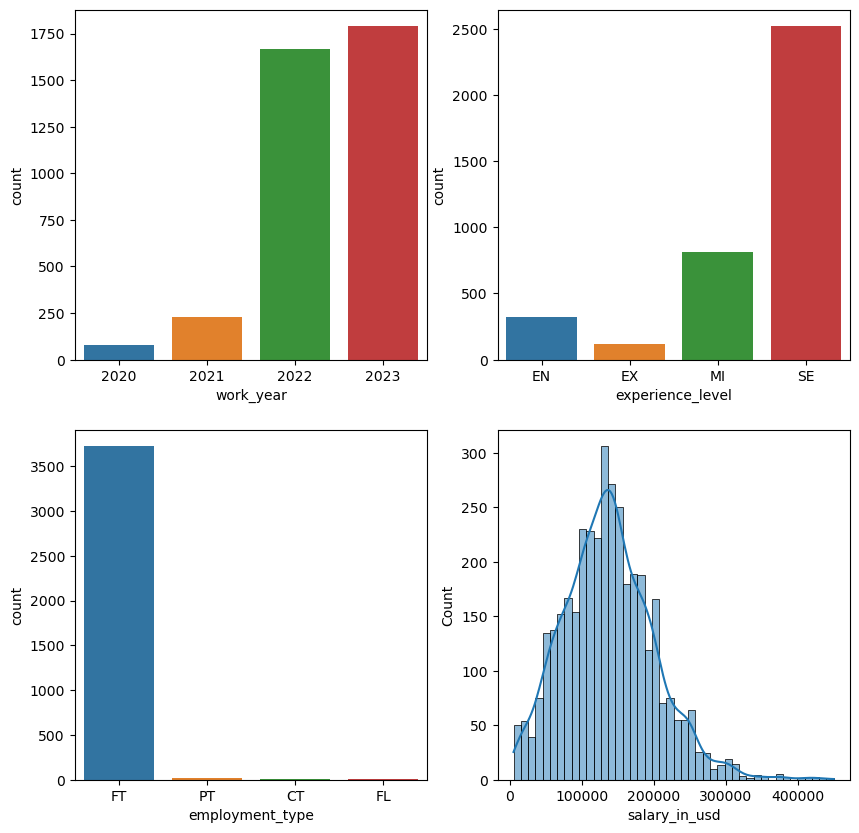

In [5]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
sns.countplot(ds_data, x = 'work_year', ax=ax[0,0])
sns.countplot(ds_data, x = 'experience_level', ax=ax[0,1])
sns.countplot(ds_data, x = 'employment_type', ax=ax[1,0])
sns.histplot(ds_data, x = 'salary_in_usd', kde=True, ax=ax[1,1])

plt.savefig('Data Description Plot')

In [7]:
salary_ranges = [0, 60000, 90000, float('inf')]
salary_labels = ['low', 'Medium', 'High']

ds_data['salary_range'] = pd.cut(ds_data['salary'], bins=salary_ranges, labels=salary_labels)

features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']
X = ds_data[features]
y = ds_data['salary_range']

label_encoder = LabelEncoder()
X_encoded = X.copy()

# Loop through categorical columns and apply label encoding
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

train_X, val_X, train_y, val_y = train_test_split(X_encoded, y, test_size = 0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(train_X, train_y)
rf_y_predictions = rf_classifier.predict(val_X)

accuracy = accuracy_score(val_y, rf_y_predictions)
classification_report_str = classification_report(val_y, rf_y_predictions, zero_division=1)

print("Accuracy: ", accuracy)
print("Classification Report: \n", classification_report_str)





Accuracy:  0.8207171314741036
Classification Report: 
               precision    recall  f1-score   support

        High       0.88      0.96      0.92       574
      Medium       0.44      0.24      0.31       100
         low       0.61      0.54      0.57        79

    accuracy                           0.82       753
   macro avg       0.64      0.58      0.60       753
weighted avg       0.79      0.82      0.80       753



In [11]:
# Creates a DataFrame for 2024 with the features
dt_2024 = pd.DataFrame({
    'work_year': [2024] * len(val_X), 
    'experience_level': ['EN'] * len(val_X),
    'employment_type': ['FT'] * len(val_X),
    'job_title': ['Applied Data Analyst'] * len(val_X),
    'company_location': ['US'] * len(val_X),
    'company_size': ['S'] * len(val_X)
})

label_encoder = LabelEncoder()

for col in dt_2024.columns:
    if dt_2024[col].dtype == 'object':
        dt_2024[col] = label_encoder.fit_transform(dt_2024[col])

predicted_salaries_2024 = rf_classifier.predict(dt_2024)

print("Predicted Salaries for 2024:")
print(predicted_salaries_2024)


Predicted Salaries for 2024:
['low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'low'
 'low' 'low' 'low' 'lo